# Calcium Oscillation Modelling

## Model description

#### Model Overview

This article introduces a two-chamber model for explaining the dynamics of calcium ions (Ca²⁺) in frog skeletal muscle fibers.

#### Description

- **Two-chamber model:** The model consists of two compartments, the sarcoplasmic reticulum (SR) and the cytoplasm, with the muscle fibers located in the cytoplasm.
- **Ca²⁺ binding proteins:** The model simulates various Ca²⁺ binding proteins in the cytoplasm, including troponin, calsequestrin, and potentially added exogenous buffers (such as EGTA or BAPTA). The primary calcium binding protein considered in the SR is calsequestrin (CSQ), with its characteristics modeled based on experimental data.
- **R calcium buffering:** The buffering effect of Ca²⁺ in the SR exhibits cooperativity, following the Hill equation. Parameters such as the total number of Ca²⁺ binding sites and the half-saturation concentration change with the initial Ca²⁺ concentration in the SR.
- **Calcium release mechanism:** The calcium release from the SR is activated by a voltage-dependent mechanism, achieved by increasing the Ca²⁺ permeability of the SR membrane.

#### Key Features

- **Voltage-activated Ca²⁺ permeability:** The model uses experimentally obtained permeability time courses and amplitudes to drive the simulation.
- **Ca²⁺ buffering system:** The characteristics of the Ca²⁺ buffering system in the SR change under low initial [Ca²⁺]SR conditions, exhibiting a higher buffering capacity.
- **Experimental validation:** The model successfully reproduces the transient changes of Ca²⁺ in the SR and cytoplasm observed in experiments.

## Model Equations

Table 1: Variables used in the model.

| Name                           |                         Description                          |
| :----------------------------- | :----------------------------------------------------------: |
| [Ca<sup>2+</sup>]              |       Free Calcium concentration in the cytoplasm (1)        |
| D                              |                 Cytoplasmic Dye (Rhod2) (1)                  |
| CaD                            |                 Ca bound Cytoplasmic Dye (1)                 |
| B                              | extrinsic Ca buffer in the cytoplasm (either EGTA or BAPTA)(1) |
| CaB                            |            Ca bound extrinsic buffer cytoplasm(1)            |
| Trop                           |                         Troponin (1)                         |
| CaTrop                         |                    Ca bound Troponin (1)                     |
| Parv                           |                       Parvalbumin (1)                        |
| MgParv                         |                 Parvalbumin bound to Mg (1)                  |
| CaParv                         |                 Parvalbumin bound to Ca (1)                  |
| R                              |                   Calcium Release Flux (2)                   |
| PF                             |                       Ca Pump Flux (2)                       |
| L                              |               SR Ca<sup>2+</sup> Leak Flux (2)               |
| [Ca<sup>2+</sup>]<sub>SR</sub> |           Free Calcium concentration in the SR (3)           |
| F                              |                Dye in the SR (Mag Fluo4) (3)                 |
| CaF                            |                     Ca bound SR Dye (3)                      |
| CSQ                            |                      Calsequestrin (3)                       |
| CaCSQ                          |               Calcium bound Calsequestrin (3)                |

---

> (1) All concentrations in $\mathrm{\mu M}$, referred to cytoplasmic volume.
> 
> (2) Change of concentration per unit time in $\mathrm{\mu M/ms}$, referred to cytoplasmic volume.
>
> (3) All concentrations in $\mathrm{\mu M}$, referred to SR volume
>

---

From Fick's First Law:

$$
\frac{d[Ca^{2+}]_{\mathrm{SR}}}{dt} = P\ A \frac{[Ca^{2+}]_{C^-} - [Ca^{2+}]_{\mathrm{SR}}}{V_{\mathrm{SR}}} \tag{1}
$$

A simplifying assumption in the following treatment is that no Ca2+ comes into or leaves the cell through the plasma membrane. Under this condition the total Ca content of the cell is constant. Thus, it holds at any time that the sum of the concentration times the volume of the compartments is constant. Calling M to this quantity, it is given by equation (2):

$$
M = [Ca^{2+}]_{C^-} V_{C^-} + [Ca^{2+}]_{\mathrm{SR}} V_{\mathrm{SR}} \tag{2}
$$

where $V_{C^-}$ and $V_{\mathrm{SR}}$ are the volumes of the cytoplasm and the SR, respectively. The volume of the cytoplasm is assumed to be constant, while the volume of the SR is assumed to be constant as well. The total volume of the cell is given by $V_{C^-} + V_{\mathrm{SR}}$.

Writing $[Ca^{2+}]_{C^-}$ in terms of $[Ca^{2+}]_{\mathrm{SR}}$ yields, we can get that:

$$
[Ca^{2+}]_{C^-} = \frac{M - [Ca^{2+}]_{\mathrm{SR}} V_{\mathrm{SR}}}{V_{C^-}} \tag{3}
$$

Substituting this into equation (1) gives:

$$
\frac{d[Ca^{2+}]_{\mathrm{SR}}}{dt} = P\ A \frac{\frac{M - [Ca^{2+}]_{\mathrm{SR}} V_{\mathrm{SR}}}{V_{C^-}} - [Ca^{2+}]_{\mathrm{SR}}}{V_{\mathrm{SR}}} \tag{4}
$$

Rearranging yields, we can get a first order linear differential equation for the SR calcium concentration:

$$
\frac{d[Ca^{2+}]_{\mathrm{SR}}}{dt} = \frac{P\ A}{V_{\mathrm{SR}}} \frac{M}{V_{C^-}} - P\ A \frac{\left( V_\mathrm{C} + V_{\mathrm{SR}}\right) [Ca^{2+}]_{\mathrm{SR}}}{V_{\mathrm{C}} V_{\mathrm{SR}}} \tag{5}
$$

We can use `Python` to get the solution of the equation (5) with the initial condition $[Ca^{2+}]_{\mathrm{SR}}(0) = 1000$, and its exponential solution.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Model parameters (corrected units)
P = 1.0e-3  # Permeability (μm/ms) to match time in ms
A = 1000    # Membrane area (μm²)
V_SR = 1000 # SR volume (μm³)
V_C = 10000 # Cytoplasm volume (μm³)
M = 1000    # Total calcium (μmol)
t = np.linspace(0, 1000, 1000)  # Time (ms)

# Corrected differential equation
def dCaSR(CaSR, t, P, A, V_SR, V_C, M):
    term1 = (P * A * M) / (V_C * V_SR)  # Source term
    term2 = (P * A * (V_C + V_SR) * CaSR) / (V_C * V_SR)  # Decay term
    dCaSR_dt = term1 - term2
    return dCaSR_dt

# Initial condition (μM)
CaSR0 = 1000  

# Solve ODE
CaSR = odeint(dCaSR, CaSR0, t, args=(P, A, V_SR, V_C, M))

# Plot
plt.plot(t, CaSR, 'r-', linewidth=2)
plt.title('SR [Ca²⁺] Transient (Exponential Decay)')
plt.xlabel('Time (ms)')
plt.ylabel('[Ca²⁺] (μM)')
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.show()


This first order linear differential equation has a well known exponential solution. The rate constant of the decaying exponential solution, k, is:

$$
k = \frac{P A (V_C + V_{SR})}{V_C V_{SR}} \tag{6}
$$

Here's the code to calculate the solution of the equation (6) and its half-life $t_{½}$:


In [ ]:
# Model parameters (corrected units)
P = 1.0e-3  # Permeability (μm/ms) to match time in ms
A = 1000    # Membrane area (μm²)
V_SR = 1000 # SR volume (μm³)
V_C = 10000 # Cytoplasm volume (μm³)
M = 1000    # Total calcium (μmol)
t = np.linspace(0, 1000, 1000)  # Time (ms)

# Calculate k
k = (P * A * (V_C + V_SR)) / (V_C * V_SR)
print(f"Decay rate constant k = {k:.4f} ms⁻¹")

# Half-life
t_half = np.log(2) / k
print(f"Half-life t_½ = {t_half:.1f} ms")


$k = 0.0011 \mathrm{ms^{-1}}$ indicates that the calcium concentration in the SR decays at a rate of 0.11% per millisecond.

The half-life $ t_{½} = \frac{\ln(2)}{k} \approx 630 \mathrm{ms} $ indicates that after approximately 630 milliseconds, the calcium concentration in the SR will decrease to half of its initial value.

Therefore, $ k $ (the inverse of the time constant $\tau$) is proportional to the permeability multiplied by a geometric factor. Additionally, the decay process can be modeled using the differential equation derived from the parameters of the system.

The simplest case of a single exponential solution is the case of a linear buffer. This is an approximation that applies when the buffer follows a single-site binding equation, is in equilibrium, and is far from saturation. In this case, the total calcium concentration in each compartment (the $[Ca]_{SR}\ TOT$ and $[Ca]_{C}\ TOT$) is proportional to the free calcium concentration. In other words, the effect of the buffer is equivalent to a volume expansion. Additionally, the dynamics of calcium concentration can be described by the following differential equation: $\frac{d[\mathrm{Ca}]}{dt} = -k[\mathrm{Ca}]$, where $k$ is the decay rate constant. Furthermore, it is important to consider the impact of various buffering agents on calcium dynamics.

Let $[Ca]_{SR} = [Ca^{2+}]_{SR} (E_{SR} + 1)$ and $[Ca]_{C} = [Ca^{2+}]_{C} (E_{C} + 1)$, we have:
$$
\begin{cases}
  [Ca]_{SR}\ TOT = [Ca^{2+}]_{SR} (E_{SR} + 1) \\
  [Ca]_{C}\ TOT = [Ca^{2+}]_{C} (E_{C} + 1) \tag{7}
\end{cases}
$$
The total calcium concentration in the SR and cytoplasm is given by the sum of the free calcium concentration and the bound calcium concentration. The binding of calcium to the buffer is assumed to follow a simple first-order reaction, where the rate of binding is proportional to the free calcium concentration and the concentration of the buffer. The rate of unbinding is also assumed to be proportional to the bound calcium concentration.

The rate constant is defined as follows:
$$
k = \frac{P A}{V_C} \left( \alpha (E_C + 1) + (E_{SR} + 1) \right) / \left( (E_C + 1)(E_{SR} + 1) \right) \tag{8}
$$
where $p = \frac{P A}{V_C}$ is the rate constant for the calcium release from the SR, and $\alpha = \frac{V_C}{V_{SR}}$ is the ratio of the cytoplasmic volume to the SR volume. The rate constant $k$ is a function of the concentrations of calcium in both compartments and the binding properties of the buffers present in each compartment.

Note that the $p$ could be measured by experiment, which is the calcium release flux divided by the calcium concentration in the SR $[Ca²⁺]_{SR}$. The volume ratio ($\frac{V_C}{V_{SR}}$) is usually estimated by morphometric studies. Under our experimental conditions, the cytoplasmic buffer concentration is high, and the cytoplasmic volume expansion may be much higher than that of the SR, $E_C \gg E_{SR}$. In addition, the volume of the SR is much smaller than that of the cytoplasm, so $\alpha \gg 1$ (usually 8 to 10). Under these two conditions, equation (8) can be further simplified to yield a rather simple result: 

$$
k = \frac{p \alpha}{(E_{SR} + 1)} \tag{9}
$$

Under this framework, the time constant $\tau$ is inversely proportional to the permeability:
$$
\tau = \frac{1}{k} \propto \frac{1}{P} \tag{10}
$$

From here, $k$ is the decay rate constant, which is a function of the permeability and the binding properties of the buffers present in each compartment. The time constant $\tau$ is a measure of how quickly the calcium concentration in the SR decays over time. A larger time constant indicates a slower decay, while a smaller time constant indicates a faster decay.

Therefore, doubling the time constant reflects a halving of the permeability. This kinetic effect supports our explanation: the fast buffer BAPTA reduces the permeability compared to the slower EGTA. This inhibitory effect may be due to BAPTA inhibiting the calcium-activated component.

In the SR, we assume that there is only one naturally occurring luminal buffer, calsequestrin (CSQ). In this study, the characteristics of this buffer are modeled based on our experimental results, using a cooperative binding model that follows the Hill equation.

## Model Inplementation

### Caculate the initial conditions

The initial conditions are calculated using the resting concentrations of Ca2+ in the cytoplasm and in the SR in the following equilibrium equations.It is assumed that binding to CSQ obeys the Hill equation.

$$
\text{[CaCSQ]} = \frac{CSQ_{TOT} \cdot [Ca^{2+}]^n}{K_{CSQ}^n + [Ca^{2+}]^n} \tag{11}
$$


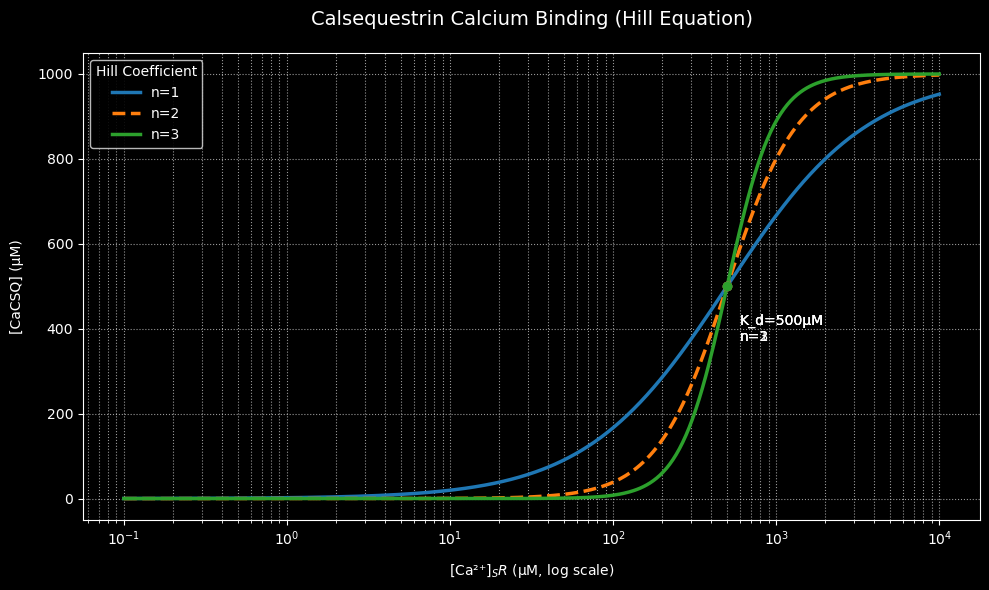

In [14]:
def calc_ca_csq(Ca_SR, CSQ_TOT, K_CSQ, n):
    """
    Calculate calcium bound to calsequestrin using Hill equation
    Args:
        Ca_SR   : Free calcium concentration in SR (μM)
        CSQ_TOT : Total calsequestrin concentration (μM)
        K_CSQ   : Dissociation constant (μM)
        n       : Hill coefficient (cooperativity)
    Returns:
        [CaCSQ] : Calcium bound to CSQ (μM)
    """
    return CSQ_TOT * (Ca_SR**n) / (K_CSQ**n + Ca_SR**n)

# Parameters
CSQ_TOT = 1000   # Total CSQ concentration (μM)
K_CSQ = 500      # Dissociation constant (μM)
n_values = [1, 2, 3]  # Different Hill coefficients to test

# Generate free calcium range (0.1 μM - 10 mM)
Ca_SR = np.logspace(-1, 4, 500)  # Logarithmic range for physiological span

# Calculate [CaCSQ] for different n values
results = {}
for n in n_values:
    results[f'n={n}'] = calc_ca_csq(Ca_SR, CSQ_TOT, K_CSQ, n)

# Plotting
plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for i, (label, data) in enumerate(results.items()):
    plt.plot(Ca_SR, data, 
             label=label, 
             linewidth=2.5,
             color=colors[i],
             linestyle='-' if i!=1 else '--')
    
    # Mark half-saturation point ([CaCSQ]=CSQ_TOT/2)
    half_sat = CSQ_TOT/2
    idx = np.abs(data - half_sat).argmin()
    plt.scatter(Ca_SR[idx], half_sat, color=colors[i], zorder=5)
    plt.text(Ca_SR[idx]*1.2, half_sat*0.8, 
             f'K_d={K_CSQ}μM\n{label}', 
             ha='left', va='center')

# Format plot
plt.xscale('log')
plt.yscale('linear')
plt.title('Calsequestrin Calcium Binding (Hill Equation)', pad=20, fontsize=14)
plt.xlabel('[Ca²⁺]$_SR$ (μM, log scale)', labelpad=10)
plt.ylabel('[CaCSQ] (μM)', labelpad=10)
plt.grid(True, which='both', linestyle=':', alpha=0.6)
plt.legend(title='Hill Coefficient', framealpha=0.9)



plt.tight_layout()
plt.show()


On the other hand the dye in the SR lumen follows a one site binding isotherm (Langmuir, 1918):

$$
\text{[CaF]} = \frac{[F]_{TOT} \cdot [Ca^{2+}]_{SR}}{K_F + [Ca^{2+}]_{SR}} \tag{12}
$$

The initial conditions are calculated using the resting concentrations of $Ca^{2+}$ in the cytoplasm and in the SR in the following equilibrium equations. It is assumed that binding to CSQ obeys the Hill equation.

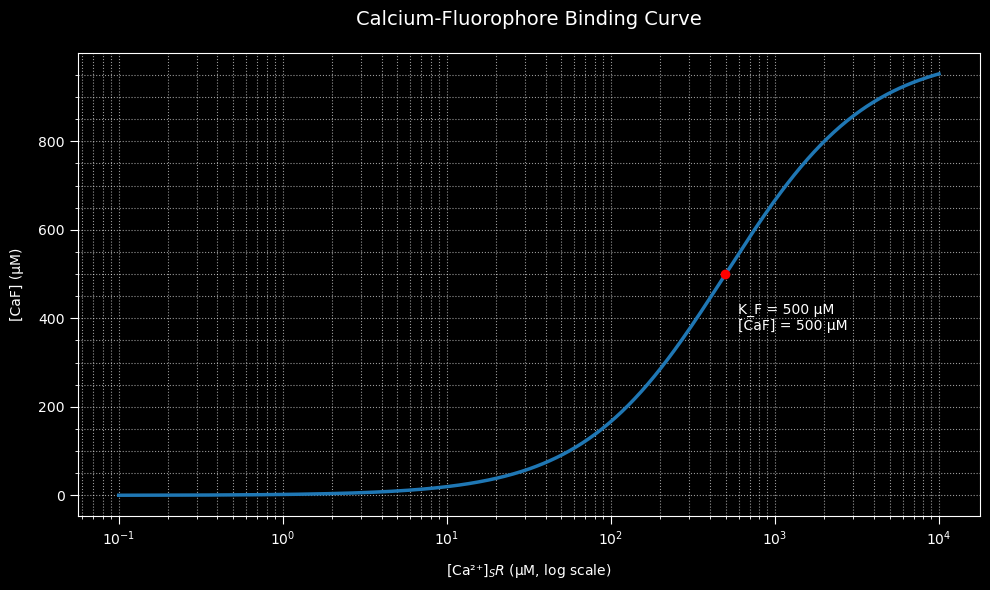

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_ca_fluorophore(F_TOT, Ca_SR, K_F):
    """
    Calculate calcium-bound fluorophore concentration [CaF] using:
    [CaF] = [F]TOT * [Ca2+]SR / (K_F + [Ca2+]SR)
    
    Args:
        F_TOT (float): Total fluorophore concentration (μM)
        Ca_SR (float or np.ndarray): Free calcium concentration in SR (μM)
        K_F (float): Dissociation constant (μM)
    
    Returns:
        float or np.ndarray: [CaF] concentration (μM)
    """
    return F_TOT * Ca_SR / (K_F + Ca_SR)

# Parameters
F_TOT = 1000  # Total fluorophore concentration (μM)
K_F = 500     # Dissociation constant (μM)

# Generate calcium concentration range (log scale for wide dynamic range)
Ca_SR = np.logspace(-1, 4, 500)  # 0.1 μM to 10000 μM

# Calculate [CaF]
CaF = calculate_ca_fluorophore(F_TOT, Ca_SR, K_F)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Ca_SR, CaF, linewidth=2.5, color='#1f77b4')

# Mark K_F point (half-saturation)
half_sat = F_TOT/2
idx = np.abs(CaF - half_sat).argmin()
plt.scatter(Ca_SR[idx], half_sat, color='red', zorder=5)
plt.text(Ca_SR[idx]*1.2, half_sat*0.8, 
         f'K_F = {K_F} μM\n[CaF] = {half_sat:.0f} μM', 
         ha='left', va='center')

# Format plot
plt.xscale('log')
plt.yscale('linear')
plt.title('Calcium-Fluorophore Binding Curve', pad=20, fontsize=14)
plt.xlabel('[Ca²⁺]$_SR$ (μM, log scale)', labelpad=10)
plt.ylabel('[CaF] (μM)', labelpad=10)
plt.grid(True, which='both', linestyle=':', alpha=0.6)

# Automatic tick adjustment
plt.gca().tick_params(axis='both', which='major', direction='out', length=6)
plt.minorticks_on()

plt.tight_layout()
plt.show()


Troponin, the extrinsic buffer and the cytoplasmic dye also follow a one site binding isotherm. Below, the respective equations are written in terms of the on and off rate constants for $Ca^{2+}$ binding as follows:

$$ 
\begin{cases}
  \text{[CaTrop]} = \dfrac{[Trop]_{TOT} \cdot [Ca^{2+}]_{C}}{K_{Trop} + [Ca^{2+}]_{C}} \\
  \text{[CaB]} = \dfrac{[B]_{TOT} \cdot [Ca^{2+}]_{C}}{K_B + [Ca^{2+}]_{C}} \\
  \text{[CaD]} = \dfrac{[D]_{TOT} \cdot [Ca^{2+}]_{C}}{K_D + [Ca^{2+}]_{C}} \tag{13}
\end{cases}
$$

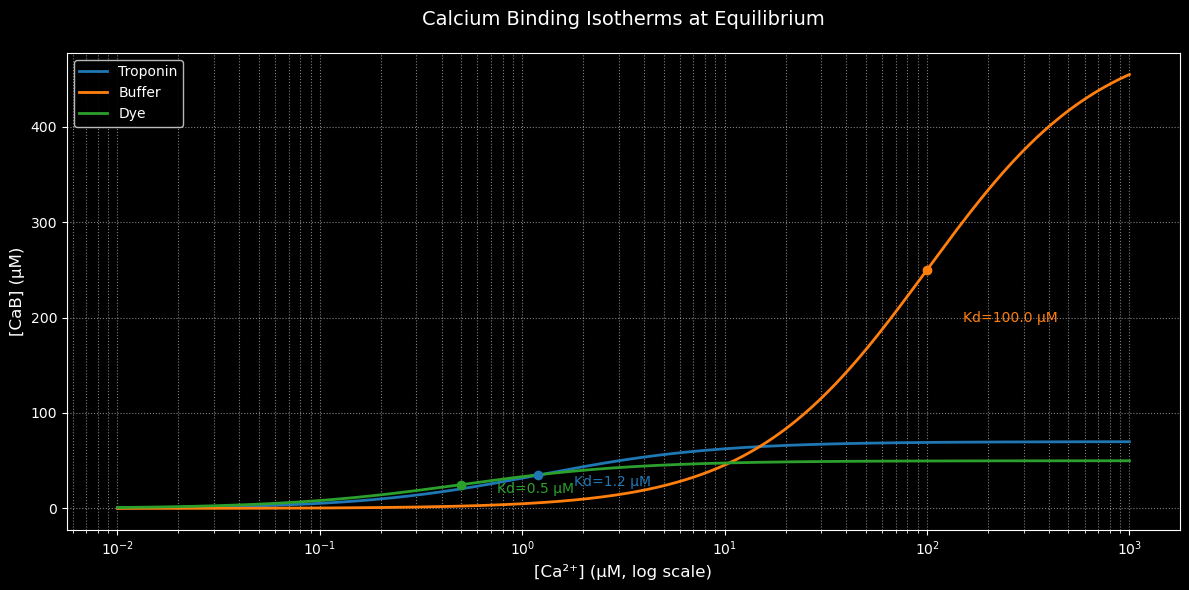

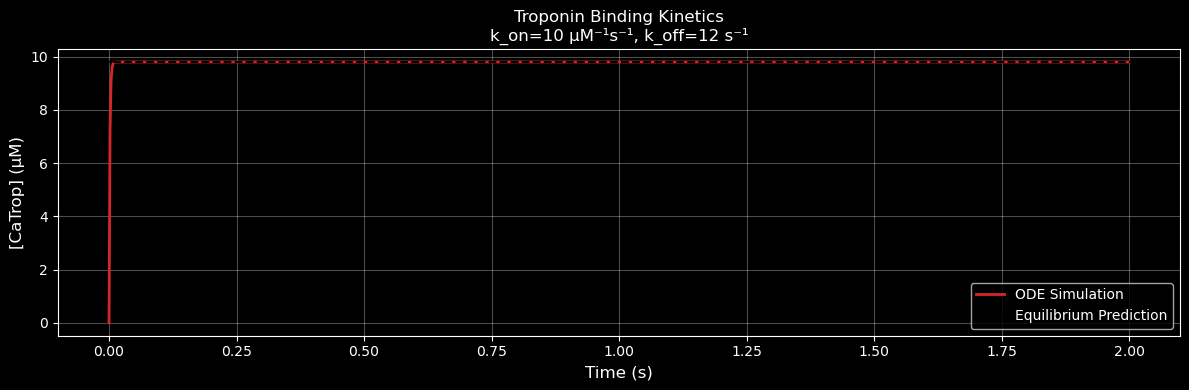

In [16]:
# 1. EQUILIBRIUM CALCULATION FUNCTION
def one_site_binding(B_TOT, Ca, k_off, k_on):
    """
    Calculate equilibrium binding using the 1-site binding isotherm equation.
    
    Args:
        B_TOT (float): Total concentration of binding sites (μM)
        Ca (float/np.array): Free calcium concentration (μM)
        k_off (float): Dissociation rate constant (s⁻¹)
        k_on (float): Association rate constant (μM⁻¹s⁻¹)
    
    Returns:
        float/np.array: Concentration of calcium-bound complex [CaB] (μM)
    """
    K_d = k_off / k_on  # Dissociation constant (μM)
    return B_TOT * Ca / (K_d + Ca)

# 2. KINETIC MODELING FUNCTION (ODE SYSTEM)
def binding_kinetics(y, t, B_TOT, k_on, k_off):
    """
    Differential equations for calcium binding kinetics.
    System: d[CaB]/dt = k_on*[Ca2+]*[B] - k_off*[CaB]
            d[Ca2+]/dt = -d[CaB]/dt (mass conservation)
    
    Args:
        y (list): Current state [Ca2+, CaB] (μM)
        t (float): Current time (s)
        B_TOT (float): Total binding sites (μM)
        k_on (float): Association rate (μM⁻¹s⁻¹)
        k_off (float): Dissociation rate (s⁻¹)
    
    Returns:
        list: Derivatives [dCa/dt, dCaB/dt]
    """
    Ca, CaB = y  # Unpack current concentrations
    B_free = B_TOT - CaB  # Calculate free binding sites
    dCaB_dt = k_on * Ca * B_free - k_off * CaB
    dCa_dt = -dCaB_dt  # Calcium conservation
    return [dCa_dt, dCaB_dt]

# 3. PARAMETERS
binding_components = {
    'Troponin': {
        'B_TOT': 70,    # Total troponin concentration (μM)
        'k_on': 10,     # Association rate (μM⁻¹s⁻¹)
        'k_off': 12     # Dissociation rate (s⁻¹)
        # Kd = 12/10 = 1.2 μM (characteristic for cardiac troponin C)
    },
    'Buffer': {
        'B_TOT': 500,   # Common EGTA-like buffer
        'k_on': 0.5,    # Slower binding
        'k_off': 50     # Kd = 100 μM (low affinity buffer)
    },
    'Dye': {
        'B_TOT': 50,    # e.g., Fluo-4 concentration
        'k_on': 8,      # Fast binding dye
        'k_off': 4      # Kd = 0.5 μM (high affinity)
    }
}

# 4. EQUILIBRIUM BINDING CURVES
Ca_range = np.logspace(-2, 3, 500)  # 0.01 μM to 1000 μM

plt.figure(figsize=(12, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Colorblind-friendly palette

# Plot binding isotherms for each component
for i, (name, params) in enumerate(binding_components.items()):
    # Calculate equilibrium binding
    CaB_eq = one_site_binding(params['B_TOT'], Ca_range, 
                             params['k_off'], params['k_on'])
    
    # Plot curve
    plt.plot(Ca_range, CaB_eq, label=name, color=colors[i], linewidth=2)
    
    # Mark Kd point (half-saturation)
    K_d = params['k_off'] / params['k_on']
    half_sat = params['B_TOT'] / 2
    plt.scatter(K_d, half_sat, color=colors[i], zorder=5)
    plt.text(K_d*1.5, half_sat*0.8, f'Kd={K_d:.1f} μM', 
             ha='left', va='center', color=colors[i])

# Format plot
plt.xscale('log')
plt.xlabel('[Ca²⁺] (μM, log scale)', fontsize=12)
plt.ylabel('[CaB] (μM)', fontsize=12)
plt.title('Calcium Binding Isotherms at Equilibrium', pad=20, fontsize=14)
plt.legend(fontsize=10, framealpha=0.9)
plt.grid(True, which='both', linestyle=':', alpha=0.5)
plt.tight_layout()

# 5. KINETIC SIMULATION (DYNAMIC VALIDATION)
# Simulate troponin binding kinetics from initial calcium pulse
troponin_params = binding_components['Troponin']

# Initial conditions: 10 μM Ca²⁺ pulse, no initial binding
y0 = [10, 0]  
t = np.linspace(0, 2, 1000)  # 2 second simulation

# Solve ODE
solution = odeint(binding_kinetics, y0, t, 
                 args=(troponin_params['B_TOT'], 
                       troponin_params['k_on'], 
                       troponin_params['k_off']))
Ca_dyn, CaB_dyn = solution.T  # Unpack results

# Calculate theoretical equilibrium for validation
final_Ca = y0[0] - CaB_dyn[-1]  # Conservation: Ca_initial = Ca_free + Ca_bound
CaB_theory = one_site_binding(troponin_params['B_TOT'], 
                             final_Ca, 
                             troponin_params['k_off'], 
                             troponin_params['k_on'])

# Plot kinetics
plt.figure(figsize=(12, 4))
plt.plot(t, CaB_dyn, label='ODE Simulation', color='#d62728', linewidth=2)
plt.axhline(CaB_theory, linestyle='--', color='k', 
            label='Equilibrium Prediction')
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('[CaTrop] (μM)', fontsize=12)
plt.title('Troponin Binding Kinetics\n' +
          f"k_on={troponin_params['k_on']} μM⁻¹s⁻¹, " +
          f"k_off={troponin_params['k_off']} s⁻¹",
          fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()


Parvalbumin binds $\mathrm{Mg^{2+}}$ or $\mathrm{Ca^{2+}}$ to the same site, showing competition between both ions. Therefore the concentrations of $\mathrm{Mg^{2+}}$ bound and $\mathrm{Ca^{2+}}$ bound forms as well as the free parvalbumin depend on the concentrations of both divalent cations.

Equations (14) define the microscopic dissociation constants for $\mathrm{Ca^{2+}}$ and $\mathrm{Mg^{2+}}$, respectively, as the ratios of the off and on rates:

$$
\begin{cases}
  \mathrm{Kd_{Ca}} = \dfrac{\mathrm{koff_{Ca}}}{\mathrm{kon_{Ca}}} \\
  \mathrm{Kd_{Mg}} = \dfrac{\mathrm{koff_{Mg}}}{\mathrm{kon_{Mg}}} \tag{14}
\end{cases}
$$


Equations (15) give the apparent dissociation constants when both divalent cations are present:

$$
\begin{cases}
  \mathrm{K_{Mg}} = \mathrm{Kd_{Mg}} \left(1 + \dfrac{\mathrm{[{Ca}^{2+}_C]}}{\mathrm{Kd_{Ca}}}\right) \\
  \mathrm{K_{Ca}} = \mathrm{Kd_{Ca}} \left(1 + \dfrac{\mathrm{[{Mg}^{2+}_C]}}{\mathrm{Kd_{Mg}}}\right) \tag{15}
\end{cases}
$$

The apparent dissociation constants are defined as the ratios of the off and on rates, taking into account the presence of both divalent cations.

Using the apparent dissociation constants, the ion bound forms of parvalbumin were calculated as:

$$
\begin{cases}
  \text{[CaParv]} = \dfrac{\mathrm{[Parv]_{TOT} \cdot [{Ca}^{2+}]_{C}}}{\mathrm{K_{Ca} + [{Ca}^{2+}]_{C}}} \\
  \text{[MgParv]} = \dfrac{\mathrm{[Parv]_{TOT} \cdot [{Mg}^{2+}]_{C}}}{\mathrm{K_{Mg} + [{Mg}^{2+}]_{C}}} \tag{16}
\end{cases}
$$


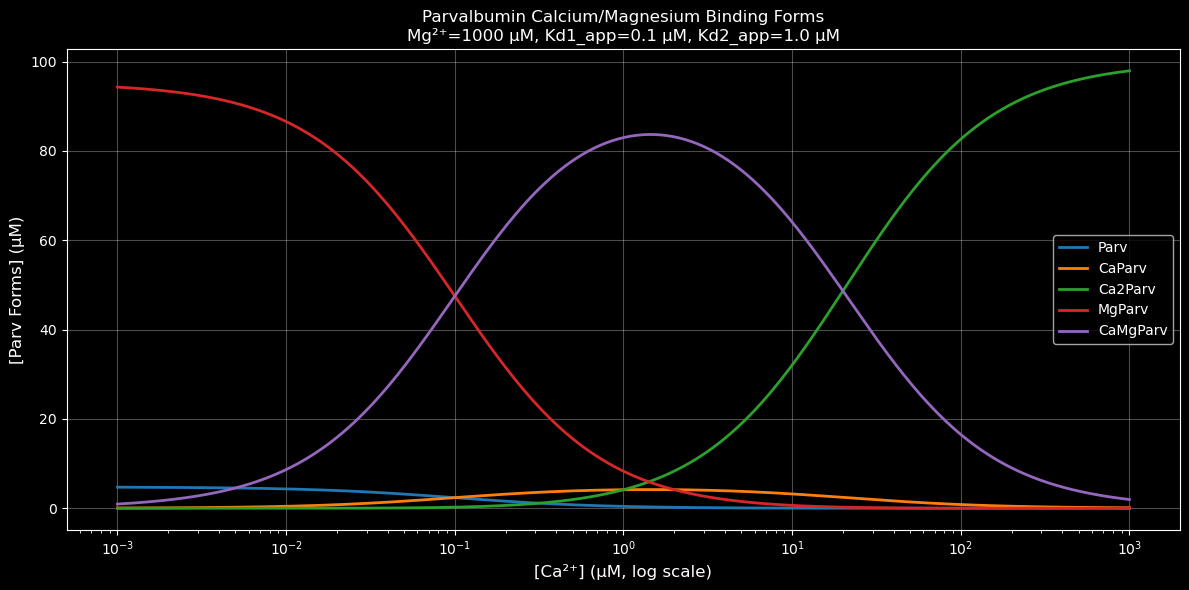

In [ ]:
def calculate_parv_forms(Parv_TOT, Ca, Mg, Kd1_app, Kd2_app, Kd_Mg_app):
    """
    Calculate concentrations of all ion-bound forms of parvalbumin.
    
    Args:
        Parv_TOT: Total parvalbumin concentration (μM)
        Ca, Mg: Free Ca²⁺ and Mg²⁺ concentrations (μM)
        Kd1_app, Kd2_app: Apparent dissociation constants for Ca²⁺ binding (μM)
        Kd_Mg_app: Apparent dissociation constant for Mg²⁺ binding (μM)
    
    Returns:
        dict: Concentrations of all binding forms
    """
    # Calculate binding probabilities
    f_Ca1 = Ca / Kd1_app  # Probability of Ca²⁺ binding to site 1
    f_Ca2 = Ca / Kd2_app  # Probability of Ca²⁺ binding to site 2
    f_Mg = Mg / Kd_Mg_app  # Probability of Mg²⁺ binding
    
    # Partition function (sum of all possible states)
    Z = 1 + f_Ca1 + f_Ca1*f_Ca2 + f_Mg + f_Ca1*f_Mg
    
    # Calculate concentrations of each form
    return {
        'Parv': Parv_TOT / Z,  # Fully unbound
        'CaParv': Parv_TOT * f_Ca1 / Z,  # Single Ca²⁺ bound
        'Ca2Parv': Parv_TOT * f_Ca1 * f_Ca2 / Z,  # Double Ca²⁺ bound
        'MgParv': Parv_TOT * f_Mg / Z,  # Single Mg²⁺ bound
        'CaMgParv': Parv_TOT * f_Ca1 * f_Mg / Z  # Mixed Ca²⁺/Mg²⁺ bound
    }

# Example parameters (typical literature values)
params = {
    'Parv_TOT': 100,   # μM (total parvalbumin concentration)
    'Kd1_app': 0.1,    # μM (apparent Kd for Ca²⁺ at site 1)
    'Kd2_app': 1.0,    # μM (apparent Kd for Ca²⁺ at site 2)
    'Kd_Mg_app': 50    # μM (apparent Kd for Mg²⁺ binding)
}

# Scan Ca²⁺ concentration range (fixed Mg²⁺ at physiological level)
Ca_range = np.logspace(-3, 3, 500)  # 1 nM to 1 mM (logarithmic range)
Mg_fixed = 1000  # μM (physiological Mg²⁺ ~0.5-1 mM)

# Initialize dictionary to store results
results = {
    form: [] for form in ['Parv', 'CaParv', 'Ca2Parv', 'MgParv', 'CaMgParv']
}

# Calculate binding forms across Ca²⁺ concentrations
for Ca in Ca_range:
    forms = calculate_parv_forms(Parv_TOT=params['Parv_TOT'],
                               Ca=Ca, Mg=Mg_fixed,
                               Kd1_app=params['Kd1_app'],
                               Kd2_app=params['Kd2_app'],
                               Kd_Mg_app=params['Kd_Mg_app'])
    # Store results for each form
    for form in results:
        results[form].append(forms[form])

# Plotting
plt.figure(figsize=(12, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Color scheme

# Plot each binding form
for i, (form, conc) in enumerate(results.items()):
    plt.plot(Ca_range, conc, label=form, color=colors[i], linewidth=2)

# Format plot
plt.xscale('log')
plt.xlabel('[Ca²⁺] (μM, log scale)', fontsize=12)
plt.ylabel('[Parv Forms] (μM)', fontsize=12)
plt.title('Parvalbumin Calcium/Magnesium Binding Forms\n' +
         f"Mg²⁺={Mg_fixed} μM, Kd1_app={params['Kd1_app']} μM, Kd2_app={params['Kd2_app']} μM",
         fontsize=12)
plt.legend(fontsize=10)  # Show legend with binding forms
plt.grid(alpha=0.3)  # Add light grid lines
plt.tight_layout()  # Adjust layout
plt.show()


The input of $\mathrm{Ca^{2+}}$ into the cytoplasm is assumed to be the release flux (R) through the RyR channels:

$$
R = p \left( [Ca^{2+}]_{SR} - [Ca^{2+}]_{C} \right) \tag{17}
$$

where $p$ is the permeability of the SR membrane to $\mathrm{Ca^{2+}}$.

The SERCA pump flux (PF) that transports $\mathrm{Ca^{2+}}$ back into the SR is given by:

$$
PF = MPF \left(\dfrac{[Ca^{2+}]_{C}}{(K_{P} + [Ca^{2+}]_{C})}\right)^{2} \tag{18}
$$

where $MPF$ is the maximum flux of the SERCA pump and $K_{P}$ is the half-saturation constant for the pump.

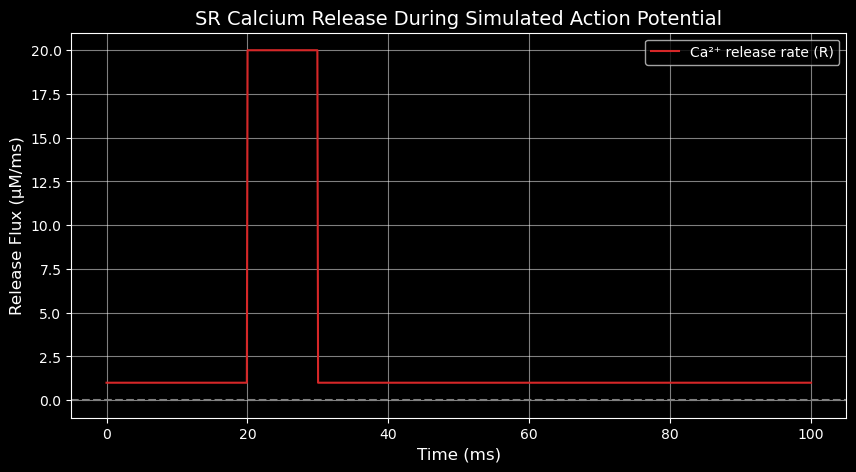

In [ ]:
def calcium_release(p, Ca_SR, Ca_C):
    """Calculate Ca²⁺ release rate from SR to cytosol."""
    return p * (Ca_SR - Ca_C)

# Parameters
p_rest = 0.001       # ms⁻¹ (resting permeability, channels mostly closed)
p_activated = 0.02   # ms⁻¹ (during action potential)
Ca_SR = 1000         # μM (SR calcium concentration)
Ca_C_rest = 0.1       # μM (resting cytosolic calcium)

# Simulate release during a pulse
time = np.linspace(0, 100, 1000)  # ms
p = np.where((time > 20) & (time < 30), p_activated, p_rest)  # Channel opens at t=20-30ms
R = calcium_release(p, Ca_SR, Ca_C_rest)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(time, R, color='#d62728', label='Ca²⁺ release rate (R)')
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Time (ms)', fontsize=12)
plt.ylabel('Release Flux (μM/ms)', fontsize=12)
plt.title('SR Calcium Release During Simulated Action Potential', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)
plt.show()


Where MPF is the maximum pump flux, Kp is the dissociation constant of the $\mathrm{{Ca}^{2+}}$ transport site on the pump. It is assumed that there are two $\mathrm{{Ca}^{2+}}$ binding sites on the pump. The two Ca²⁺ ions are assumed to bind independently to these sites and simultaneously transported. Therefore, the pump flux is proportional to the fraction of the pump bound to two Ca²⁺ ions. Finally, the leak of $\mathrm{{Ca}^{2+}}$ from the SR (L) is assumed to be equal to the pump flux at rest and considered constant during the release process. Calling PFo to the resting pump flux, evaluated with equation (18) at the resting $\mathrm{{Ca}^{2+}}_{C}$, we have $L = \mathrm{PFo}$, where PFo is given by equation (18) and is evaluated as follows: 

$$
PFo = MPF \left(\dfrac{[Ca^{2+}]_{C}}{(K_{P} + [Ca^{2+}]_{C})}\right)^{2} \tag{19}
$$

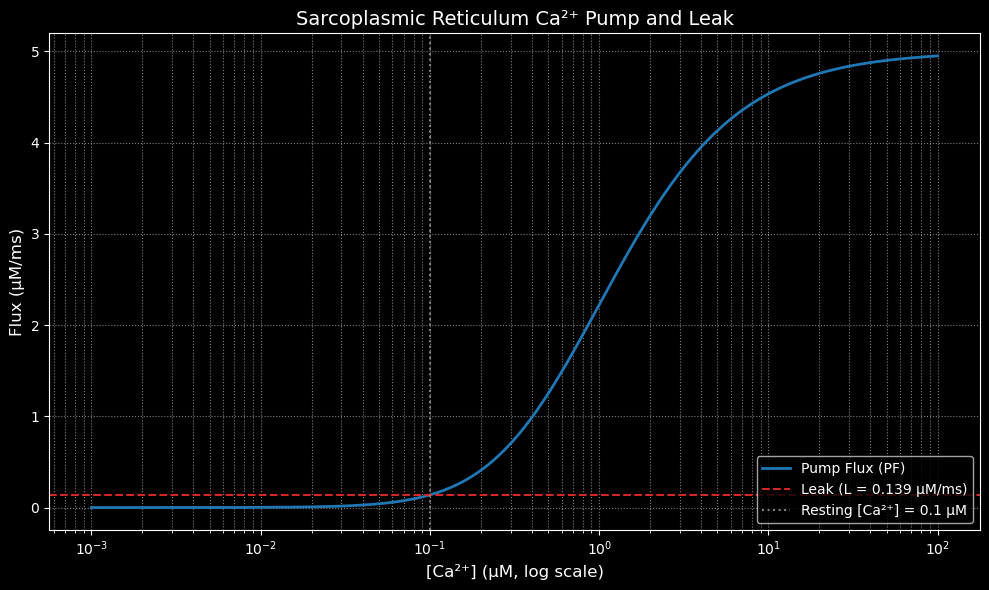

In [ ]:
def pump_flux(Ca, MPF, Kp):
    """
    Calculate calcium pump flux using two-site binding model
    
    Args:
        Ca (float or np.array): Cytosolic calcium concentration (μM)
        MPF (float): Maximum pump flux (μM/ms)
        Kp (float): Dissociation constant of Ca²⁺ binding sites (μM)
    
    Returns:
        float or np.array: Pump flux (μM/ms)
    """
    return MPF * (Ca / (Kp + Ca))**2  # Square term for two binding sites

# Parameters (typical values for cardiac muscle)
MPF = 5.0    # Maximum pump flux (μM/ms)
Kp = 0.5     # Ca²⁺ dissociation constant (μM)
Ca_rest = 0.1  # Resting calcium concentration (μM)

# Calculate resting pump flux (PF0) and leak (L)
PF0 = pump_flux(Ca_rest, MPF, Kp)  # Pump flux at resting [Ca²⁺]
L = PF0  # Leak is assumed equal to resting pump flux

# Generate range of calcium concentrations (log scale from 1 nM to 100 μM)
Ca_range = np.logspace(-3, 2, 500)  # 0.001 to 100 μM
PF = pump_flux(Ca_range, MPF, Kp)  # Calculate pump flux across range

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(Ca_range, PF, 
         label='Pump Flux (PF)', 
         color='#1f77b4', 
         linewidth=2)

# Add horizontal line for leak rate
plt.axhline(L, 
            linestyle='--', 
            color='#d62728', 
            label=f'Leak (L = {L:.3f} μM/ms)')

# Add vertical line for resting calcium
plt.axvline(Ca_rest, 
            linestyle=':', 
            color='gray', 
            label=f'Resting [Ca²⁺] = {Ca_rest} μM')

# Format plot
plt.xscale('log')  # Log scale for calcium axis
plt.xlabel('[Ca²⁺] (μM, log scale)', fontsize=12)
plt.ylabel('Flux (μM/ms)', fontsize=12)
plt.title('Sarcoplasmic Reticulum Ca²⁺ Pump and Leak', fontsize=14)
plt.legend(fontsize=10, loc='lower right')
plt.grid(True, which='both', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()


The following differential equations are used for the SR compartment.

As mentioned, within the SR we consider only one intrinsic buffer, CSQ. The indicator dye is a minor contributor to the overall buffering. The binding of Ca2+ to CSQ and to the dye is assumed to be very fast and therefore is treated as equilibrium in both cases.
Equations (28) and (29) give the buffer power of each Ca binding species.
(28)ECSQ = d[CaCSQ]/d[Ca2+]SR = n CSQTOT KCSQn [Ca2+]SR n-1 /(KCSQ n + [Ca2+]SR n)2
(29)EF = d[CaF]/d[Ca2+]SR = FTOT KF /(KF + [Ca2+]SR)2

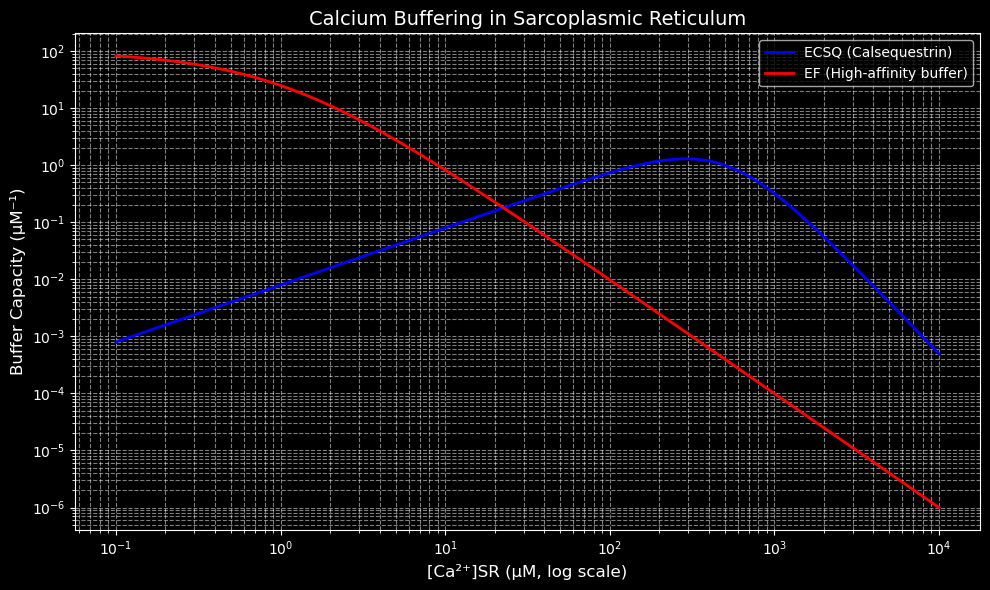

In [ ]:
def E_CSQ(Ca_SR, CSQ_TOT, K_CSQ, n):
    """
    Calculate the buffering capacity of calsequestrin (CSQ) in the sarcoplasmic reticulum (SR).
    
    Args:
        Ca_SR (float or np.array): Free calcium concentration in SR (μM)
        CSQ_TOT (float): Total concentration of CSQ (μM)
        K_CSQ (float): Dissociation constant of CSQ for Ca²⁺ (μM)
        n (int): Hill coefficient (cooperativity)
    
    Returns:
        float or np.array: CSQ buffering capacity (μM⁻¹)
    """
    numerator = n * CSQ_TOT * (K_CSQ**n) * (Ca_SR**(n-1))
    denominator = (K_CSQ**n + Ca_SR**n)**2
    return numerator / denominator

def E_F(Ca_SR, F_TOT, K_F):
    """
    Calculate the buffering capacity of high-affinity calcium binding proteins (e.g., parvalbumin).
    
    Args:
        Ca_SR (float or np.array): Free calcium concentration in SR (μM)
        F_TOT (float): Total concentration of high-affinity buffer (μM)
        K_F (float): Dissociation constant of buffer for Ca²⁺ (μM)
    
    Returns:
        float or np.array: Buffer capacity (μM⁻¹)
    """
    return F_TOT * K_F / (K_F + Ca_SR)**2

# Parameter settings (typical physiological values)
CSQ_TOT = 1000  # μM (total CSQ concentration in SR)
K_CSQ = 500     # μM (CSQ dissociation constant - low affinity)
n = 2           # Hill coefficient (cooperative binding)

F_TOT = 100     # μM (total high-affinity buffer concentration)
K_F = 1         # μM (high-affinity buffer dissociation constant)

# Generate range of SR calcium concentrations (log scale from 0.1 μM to 10,000 μM)
Ca_SR_range = np.logspace(-1, 4, 500)  # 0.1 to 10,000 μM

# Calculate buffering capacities across the concentration range
ECSQ_values = E_CSQ(Ca_SR_range, CSQ_TOT, K_CSQ, n)  # CSQ buffering
EF_values = E_F(Ca_SR_range, F_TOT, K_F)            # High-affinity buffer

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(Ca_SR_range, ECSQ_values, 
         label='ECSQ (Calsequestrin)', 
         color='blue', 
         linewidth=2)
plt.plot(Ca_SR_range, EF_values, 
         label='EF (High-affinity buffer)', 
         color='red', 
         linewidth=2)

# Format plot with log scales
plt.xscale('log')  # Log scale for x-axis ([Ca²⁺]SR)
plt.yscale('log')  # Log scale for y-axis (buffering capacity)

# Label axes and add title
plt.xlabel('[Ca²⁺]SR (μM, log scale)', fontsize=12)
plt.ylabel('Buffer Capacity (μM⁻¹)', fontsize=12)
plt.title('Calcium Buffering in Sarcoplasmic Reticulum', fontsize=14)

# Add legend and grid
plt.legend(fontsize=10, loc='upper right')
plt.grid(True, which='both', linestyle='--', alpha=0.5)

# Adjust layout and display plot
plt.tight_layout()
plt.show()


At any given moment, all forms of Ca within the SR satisfy equation (30).
(30)[Ca]SR TOT = [Ca2+]SR + [CaCSQ] + [CaF]

The change of total Ca in the SR per unit change in free Ca2+ is given by equation (31) and its rate of change by equation (32).(31)d[Ca]SRTOT/d[Ca2+]SR = 1 + ECSQ + EF
(32)d[Ca]SRTOT/dt = (d[Ca]SRTOT/d[Ca2+]SR) (d[Ca2+]SR /dt)
The rate of change in total Ca concentration in the SR is the result of the balance of the Ca2+ fluxes, scaled by the ratio of volumes, as they are defined referring to the cytoplasmic volume. This is evaluated with equation (33) and the rate of change in free Ca2+ with equation (34).
(33)d[Ca]SRTOT/dt = (-R-L + PF)VC/VSR
(34)d[Ca2+]SR /dt = d[Ca]SRTOT/dt /(1 + ECSQ + EF)

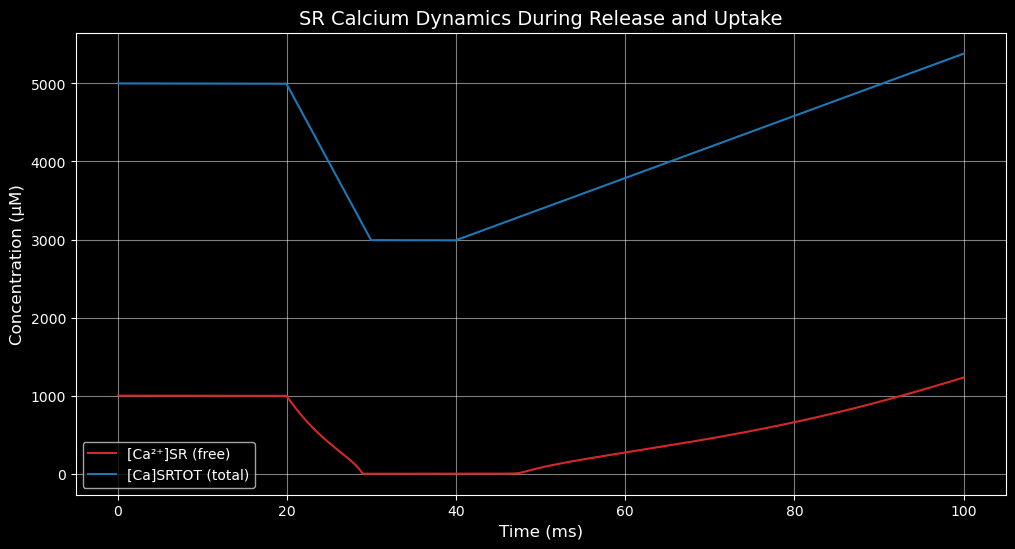

In [ ]:
# Parameters
V_C = 20.0    # Cytosolic volume (μm³)
V_SR = 1.0    # Sarcoplasmic reticulum volume (μm³)
CSQ_TOT = 1000  # Total calsequestrin concentration (μM)
K_CSQ = 500    # Calsequestrin dissociation constant (μM)
n = 2          # Hill coefficient (cooperativity)
F_TOT = 100    # Total high-affinity buffer concentration (μM)
K_F = 1        # High-affinity buffer dissociation constant (μM)

# Buffer capacity functions
def E_CSQ(Ca_SR):
    """
    Calculate calsequestrin buffering capacity.
    
    Args:
        Ca_SR (float): Free calcium concentration in SR (μM)
    
    Returns:
        float: Buffering capacity (μM⁻¹)
    """
    numerator = n * CSQ_TOT * (K_CSQ**n) * (Ca_SR**(n-1))
    denominator = (K_CSQ**n + Ca_SR**n)**2
    return numerator / denominator

def E_F(Ca_SR):
    """
    Calculate high-affinity buffer capacity.
    
    Args:
        Ca_SR (float): Free calcium concentration in SR (μM)
    
    Returns:
        float: Buffering capacity (μM⁻¹)
    """
    return F_TOT * K_F / (K_F + Ca_SR)**2

# Differential equations for SR calcium dynamics
def dCa_dt(t, y, R_func, L_func, PF_func):
    """
    Calculate derivatives of free and total SR calcium concentrations.
    
    Args:
        t (float): Time (ms)
        y (list): [Ca_SR, Ca_SR_TOT] current concentrations (μM)
        R_func, L_func, PF_func: Functions for release, leak and pump fluxes
    
    Returns:
        list: [dCa_SR/dt, dCa_SR_TOT/dt]
    """
    Ca_SR, Ca_SR_TOT = y
    
    # Calculate total buffering capacity
    E_total = 1 + E_CSQ(Ca_SR) + E_F(Ca_SR)
    
    # Rate of change of total SR calcium
    dCa_TOT = (-R_func(t) - L_func(t) + PF_func(t)) * (V_C / V_SR)
    
    # Rate of change of free SR calcium (buffered by proteins)
    dCa_SR = dCa_TOT / E_total
    
    return [dCa_SR, dCa_TOT]

# Simulation parameters
t_span = (0, 100)  # Time range (ms)
t_eval = np.linspace(*t_span, 1000)  # Time points for evaluation

# Calcium flux functions
def R(t):
    """Calcium release flux (μM/ms)"""
    return 10.0 if 20 < t < 30 else 0.0  # Active release between 20-30ms

def L(t):
    """Constant calcium leak flux (μM/ms)"""
    return 0.01

def PF(t):
    """Calcium pump flux (μM/ms)"""
    return 2.0 if t > 40 else 0.0  # Pump activates after 40ms

# Initial conditions [free Ca²⁺, total Ca] in SR (μM)
y0 = [1000.0, 5000.0]

# Numerical integration (Euler method)
dt = t_eval[1] - t_eval[0]
Ca_SR = [y0[0]]  # Free calcium history
Ca_TOT = [y0[1]]  # Total calcium history

for t in t_eval[1:]:
    # Calculate derivatives
    dCa_SR, dCa_TOT = dCa_dt(t, [Ca_SR[-1], Ca_TOT[-1]], R, L, PF)
    
    # Update concentrations
    Ca_SR.append(Ca_SR[-1] + dCa_SR * dt)
    Ca_TOT.append(Ca_TOT[-1] + dCa_TOT * dt)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(t_eval, Ca_SR, label='[Ca²⁺]SR (free)', color='#d62728')
plt.plot(t_eval, Ca_TOT, label='[Ca]SRTOT (total)', color='#1f77b4')
plt.xlabel('Time (ms)', fontsize=12)
plt.ylabel('Concentration (μM)', fontsize=12)
plt.title('SR Calcium Dynamics During Release and Uptake', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)
plt.show()


The following are the differential equations for the cytoplasmic compartment. 

 The values used in each simulation are given in the legend of the figures and in Table 2, Table 3.

加上表2、表3

Equations (35), (36), (37), (38), (39) are the rate laws for each Ca2+ binding species.
(35)d[CaD]/dt = konD [Ca 2+ ]C ([D] TOT - [CaD]) -koffD [CaD ]
(36)d[CaB]/dt = konB [Ca 2+ ]C([B] TOT - [CaB]) - koffB [CaB ]
(37)d[CaTrop]/dt = konT [Ca 2+ ]C([Trop] TOT - [CaTrop) -koffT [CaTrop]
(38)d[CaParv]/dt = konCa [Ca 2+ ]C([Parv] TOT - [CaParv]- [MgParv]) -koffCa [CaParv]
(39)d[MgParv]/dt = konMg [Mg 2+ ]([Parv] TOT - [CaParv]- [MgParv]) -koffMg [MgParv]

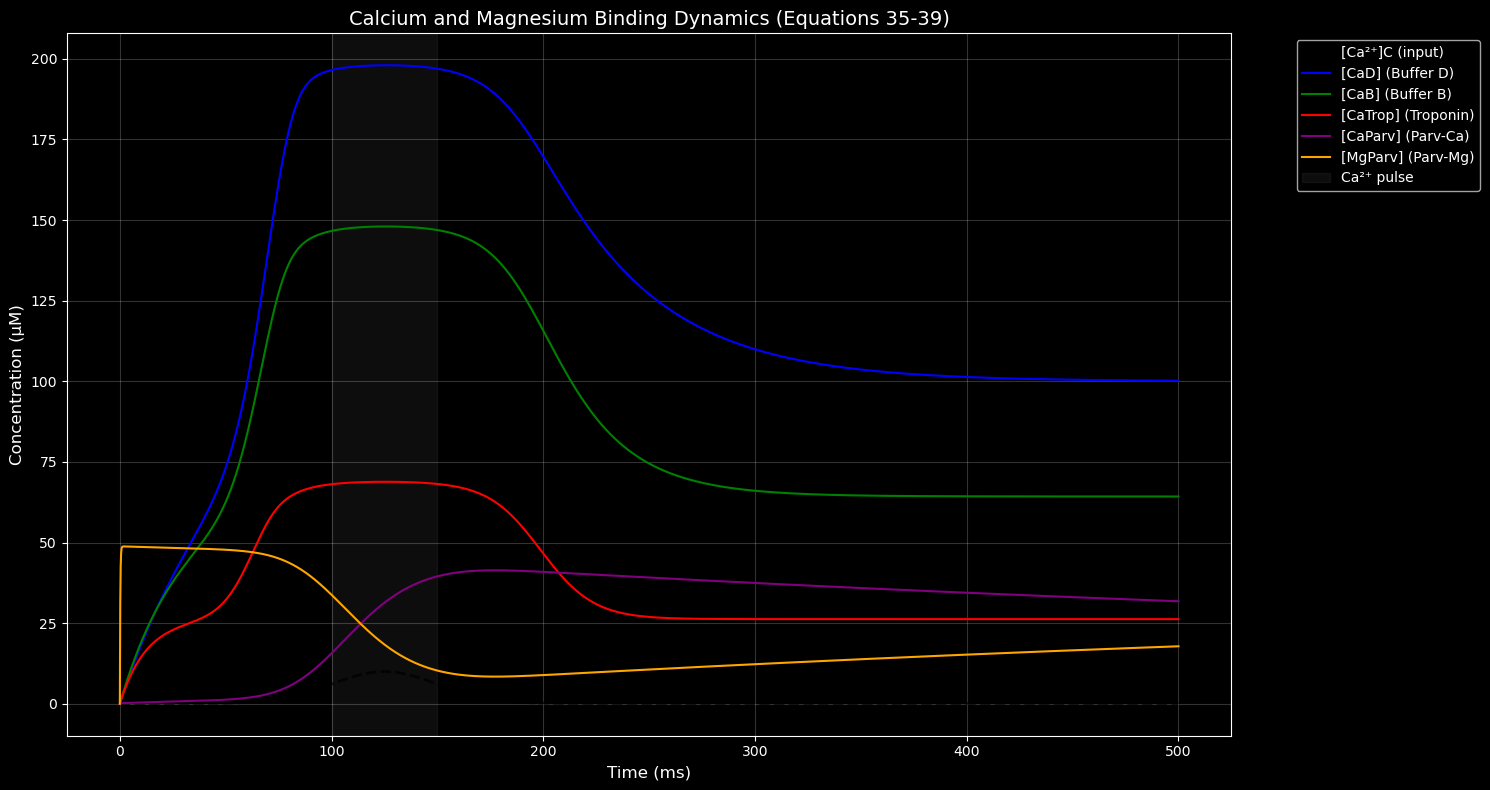

In [ ]:
# Parameters for the calcium binding model
params = {
    # Buffer D
    'konD': 0.1,     # μM⁻¹·ms⁻¹
    'koffD': 0.01,   # ms⁻¹
    'D_TOT': 200,    # μM
    
    # Buffer B
    'konB': 0.15,    
    'koffB': 0.02,   
    'B_TOT': 150,    
    
    # Troponin
    'konT': 0.3,     
    'koffT': 0.05,   
    'Trop_TOT': 70,  
    
    # Parvalbumin
    'konCa': 0.2,    
    'koffCa': 0.001, 
    'konMg': 0.005,  # 降低Mg结合速率防止溢出
    'koffMg': 0.1,   
    'Parv_TOT': 50,  
    'Mg': 1000       # μM (恒定[Mg²⁺])
}

# 微分方程系统
def dy_dt(y, t, Ca_func, params):
    CaD, CaB, CaTrop, CaParv, MgParv = y
    
    # 获取当前[Ca²⁺]C (从外部函数)
    Ca_C = Ca_func(t)
    
    # 计算free Parvalbumin (确保非负)
    free_Parv = max(0, params['Parv_TOT'] - CaParv - MgParv)
    
    # 方程35: d[CaD]/dt
    dCaD = params['konD'] * Ca_C * (params['D_TOT'] - CaD) - params['koffD'] * CaD
    
    # 方程36: d[CaB]/dt
    dCaB = params['konB'] * Ca_C * (params['B_TOT'] - CaB) - params['koffB'] * CaB
    
    # 方程37: d[CaTrop]/dt
    dCaTrop = params['konT'] * Ca_C * (params['Trop_TOT'] - CaTrop) - params['koffT'] * CaTrop
    
    # 方程38: d[CaParv]/dt
    dCaParv = params['konCa'] * Ca_C * free_Parv - params['koffCa'] * CaParv
    
    # 方程39: d[MgParv]/dt
    dMgParv = params['konMg'] * params['Mg'] * free_Parv - params['koffMg'] * MgParv
    
    return [dCaD, dCaB, dCaTrop, dCaParv, dMgParv]

# 定义钙输入函数 (高斯脉冲)
def Ca_input(t):
    return 0.1 + 9.9 * np.exp(-0.5*((t-125)/25)**2)  # 峰值10μM，宽度~50ms

# 时间数组
t = np.linspace(0, 500, 5000)  # 0-500ms, 5000点

# 初始条件 [CaD, CaB, CaTrop, CaParv, MgParv]
y0 = [0, 0, 0, 0, 0]

# 使用ODEINT求解 (自动处理数值稳定性)
sol = odeint(dy_dt, y0, t, args=(Ca_input, params))
CaD, CaB, CaTrop, CaParv, MgParv = sol.T

# 绘图
plt.figure(figsize=(15, 8))

# 绘制输入钙信号
plt.plot(t, Ca_input(t), 'k--', label='[Ca²⁺]C (input)', linewidth=2, alpha=0.7)

# 绘制所有钙结合物种
plt.plot(t, CaD, label='[CaD] (Buffer D)', color='blue', linewidth=1.5)
plt.plot(t, CaB, label='[CaB] (Buffer B)', color='green', linewidth=1.5)
plt.plot(t, CaTrop, label='[CaTrop] (Troponin)', color='red', linewidth=1.5)
plt.plot(t, CaParv, label='[CaParv] (Parv-Ca)', color='purple', linewidth=1.5)
plt.plot(t, MgParv, label='[MgParv] (Parv-Mg)', color='orange', linewidth=1.5, linestyle='-')

# 标记钙脉冲区域
plt.axvspan(100, 150, color='gray', alpha=0.1, label='Ca²⁺ pulse')

# 图例和标签
plt.xlabel('Time (ms)', fontsize=12)
plt.ylabel('Concentration (μM)', fontsize=12)
plt.title('Calcium and Magnesium Binding Dynamics (Equations 35-39)', fontsize=14)
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.2)

plt.tight_layout()
plt.show()


The rate of change in the total cytoplasmic Ca concentration is the sum of all the rates of change of the bound Ca plus the rate of change of the cytoplasmic [Ca 2+ ] (equation (40)).
(40)d[Ca]C TOT/dt = d[Ca2+]C /dt + d[CaD]/dt + d[CaB]/dt + d[CaTrop]/dt + d[CaParv]/dt
Also, the rate of change in the total cytoplasmic Ca concentration is the balance of the fluxes into the cytoplasm from the SR (release and leak fluxes), and to the SR from the cytoplasm (pump flux), as expressed in equation (41).
(41)d[Ca]C TOT/dt = R + L - PF
Substituting equation (41) in equation (40) and solving for the rate of change of the free Ca2+ concentration in the cytoplasm yields equation (42). This is used to calculate the rate of change of the [Ca 2+ ] in the cytoplasm
(42)d[Ca2+]C /dt = R + L - PF -d[CaD]/dt - d[CaB]/dt -d[CaTrop]/dt -d[CaParv]/dt

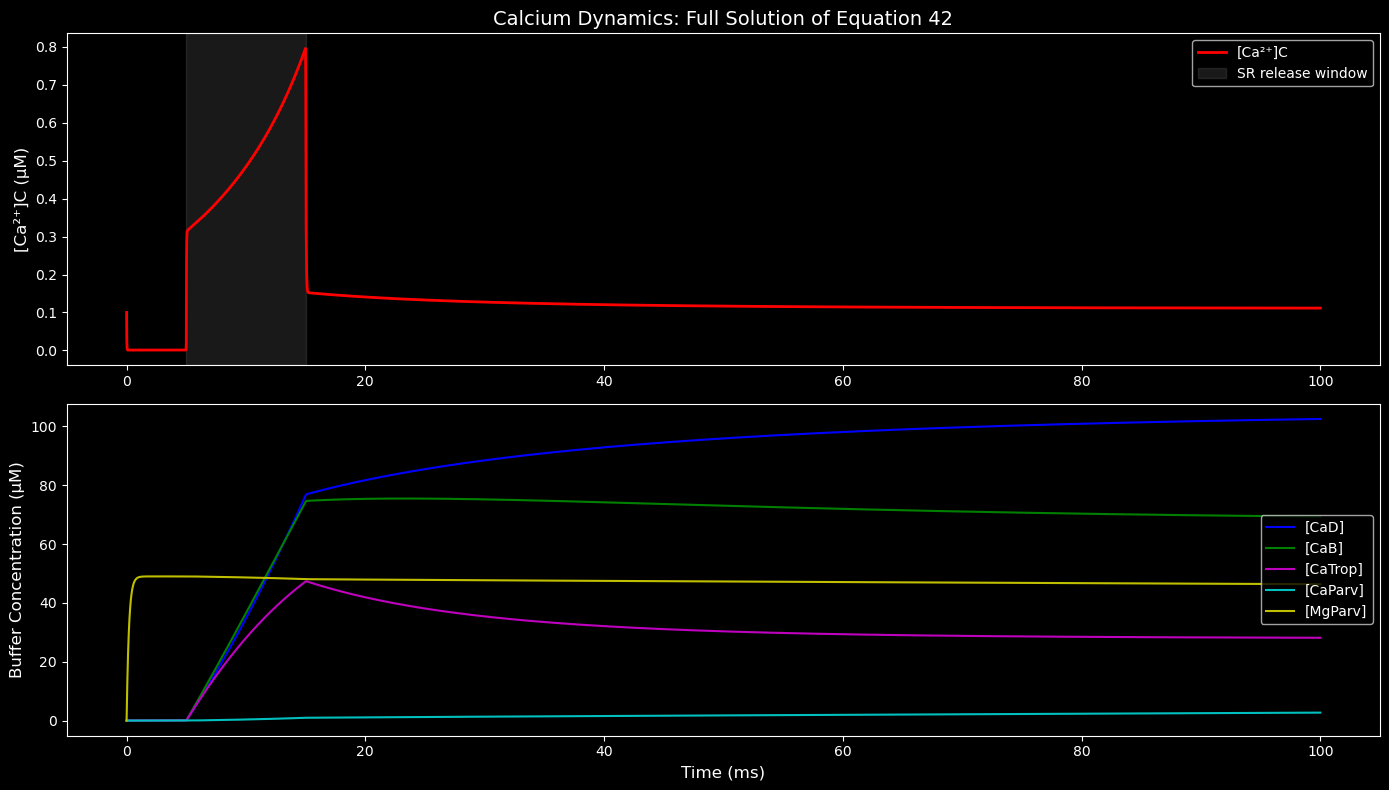

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# ====================
# PARAMETER DEFINITION
# ====================
params = {
    # Transmembrane flux parameters
    'R_max': 20.0,    # μM/ms (max SR release rate)
    't_R': 10.0,      # ms (release duration)
    'L': 0.05,        # μM/ms (constant leak)
    'k_pump': 0.15,   # ms⁻¹ (pump rate constant)
    
    # Buffer system parameters
    # Buffer D
    'konD': 0.1,      # μM⁻¹·ms⁻¹ (binding rate)
    'koffD': 0.01,    # ms⁻¹ (unbinding rate)
    'D_TOT': 200,     # μM (total buffer concentration)
    
    # Buffer B
    'konB': 0.15,    
    'koffB': 0.02,   
    'B_TOT': 150,    
    
    # Troponin
    'konT': 0.3,     
    'koffT': 0.05,   
    'Trop_TOT': 70,  
    
    # Parvalbumin
    'konCa': 0.2,    # Ca²⁺ binding rate
    'koffCa': 0.001, # Ca²⁺ unbinding rate
    'konMg': 0.005,  # Mg²⁺ binding rate
    'koffMg': 0.1,   # Mg²⁺ unbinding rate
    'Parv_TOT': 50,  # Total parvalbumin
    'Mg': 1000       # μM (constant [Mg²⁺])
}

# ====================
# DIFFERENTIAL EQUATION SYSTEM
# ====================
def dy_dt(y, t, params):
    # Unpack variables
    CaC, CaD, CaB, CaTrop, CaParv, MgParv = y
    
    # ---- Transmembrane fluxes ----
    # SR release (pulse stimulus, 5-15ms)
    R = params['R_max'] if 5 < t < 15 else 0.0
    
    # Calcium pumps (SERCA/PMCA)
    PF = params['k_pump'] * CaC  # Pump flux proportional to [Ca²⁺]C
    
    # ---- Buffer system dynamics ----
    # Equation 35: d[CaD]/dt
    dCaD = params['konD'] * CaC * (params['D_TOT'] - CaD) - params['koffD'] * CaD
    
    # Equation 36: d[CaB]/dt
    dCaB = params['konB'] * CaC * (params['B_TOT'] - CaB) - params['koffB'] * CaB
    
    # Equation 37: d[CaTrop]/dt
    dCaTrop = params['konT'] * CaC * (params['Trop_TOT'] - CaTrop) - params['koffT'] * CaTrop
    
    # Equations 38-39: Parvalbumin dynamics
    free_Parv = max(0, params['Parv_TOT'] - CaParv - MgParv)  # Non-negative protection
    dCaParv = params['konCa'] * CaC * free_Parv - params['koffCa'] * CaParv
    dMgParv = params['konMg'] * params['Mg'] * free_Parv - params['koffMg'] * MgParv
    
    # ---- Main Equation 42 ----
    dCaC = (R + params['L'] - PF) - (dCaD + dCaB + dCaTrop + dCaParv)
    
    return [dCaC, dCaD, dCaB, dCaTrop, dCaParv, dMgParv]

# ====================
# NUMERICAL SOLUTION
# ====================
# Time array (0-100ms, high resolution)
t = np.linspace(0, 100, 5000)

# Initial conditions [CaC, CaD, CaB, CaTrop, CaParv, MgParv]
y0 = [0.1, 0, 0, 0, 0, 0]  # Baseline [Ca²⁺]C = 0.1μM

# Solve ODE system
sol = odeint(dy_dt, y0, t, args=(params,))
CaC, CaD, CaB, CaTrop, CaParv, MgParv = sol.T

# ====================
# VISUALIZATION
# ====================
plt.figure(figsize=(14, 8))

# 1. Plot [Ca²⁺]C and fluxes
ax1 = plt.subplot(211)
plt.plot(t, CaC, 'r-', label='[Ca²⁺]C', linewidth=2)
plt.axvspan(5, 15, color='gray', alpha=0.2, label='SR release window')
plt.ylabel('[Ca²⁺]C (μM)', fontsize=12)
plt.title('Calcium Dynamics: Full Solution of Equation 42', fontsize=14)
plt.legend(loc='upper right')

# 2. Plot all buffer species
ax2 = plt.subplot(212)
plt.plot(t, CaD, 'b-', label='[CaD]')
plt.plot(t, CaB, 'g-', label='[CaB]')
plt.plot(t, CaTrop, 'm-', label='[CaTrop]')
plt.plot(t, CaParv, 'c-', label='[CaParv]')
plt.plot(t, MgParv, 'y-', label='[MgParv]')

plt.xlabel('Time (ms)', fontsize=12)
plt.ylabel('Buffer Concentration (μM)', fontsize=12)
plt.legend(loc='right')

plt.tight_layout()
plt.show()


数字模拟

根据fig1实验拟合相关参数，EGTA 是主要的缓冲剂，而 Parvalbumin 和 Troponin 是生理性缓冲剂。

In order to reduce noise in the simulations, we approximate the experimental p(t) with the function:
(43)p(t) = pmax {(1-exp(-t/τ1))N((1-b) exp(-t/τ2) + b)} exp(-t/τ3).

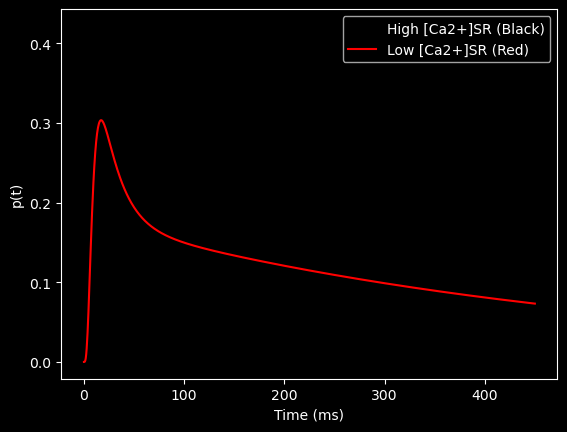

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def p(t, pmax, tau1, N, b, tau2, tau3):
    activation = (1 - np.exp(-t/tau1))**N
    fast_decay = (1 - b) * np.exp(-t/tau2) + b
    slow_decay = np.exp(-t/tau3)
    return pmax * activation * fast_decay * slow_decay

t = np.linspace(0, 450, 1000)  # 实验脉冲450ms
params_highSR = {'pmax': 1.0, 'tau1': 5, 'N': 4, 'b': 0.1, 'tau2': 20, 'tau3': 1000}  # 高[Ca2+]SR
params_lowSR = {'pmax': 0.6, 'tau1': 5, 'N': 4, 'b': 0.3, 'tau2': 20, 'tau3': 500}    # 低[Ca2+]SR

plt.plot(t, p(t, **params_highSR), 'k-', label='High [Ca2+]SR (Black)')
plt.plot(t, p(t, **params_lowSR), 'r-', label='Low [Ca2+]SR (Red)')
plt.xlabel('Time (ms)')
plt.ylabel('p(t)')
plt.legend()
plt.show()


图2 拟合实验曲线得到SR钙释放通量（RyR通道）、SERCA泵的钙摄取通量 以及 SR内钙结合态的变化之间的关系
图3通过 理论模拟 验证了实验测得的SR钙通透性 ( p(t) ) 和钙结合蛋白（CSQ）参数如何共同驱动SR和胞质钙瞬变。

图4对比实验数据和模拟结果，发现在高 ([Ca^{2+}]_{\text{SR}}) 条件下拟合的CSQ参数 无法直接适用于低 \([Ca^{2+}]_{\text{SR}}\) 条件。
图5通过对比 CaBmin = 0 和 CaBmin ≠ 0 的希尔方程拟合结果，揭示了 SR钙结合蛋白（CSQ）在低 \([Ca^{2+}]_{\text{SR}}\) 范围内的缓冲能力对动态模拟的关键影响，模型需要引入 CaBmin 和多缓冲系统。

图6通过 线性近似方法 简化了SR内部钙缓冲的动态描述，并验证了这种简化在模拟SR钙瞬变和释放通量中的适用性。